In [1]:
from DepthVisualizer import DepthRenderer, Utils
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
renderer = DepthRenderer(1200, 800, camera_fov=100)
renderer.hide_window()  # If you only want to extract rendered frames, you can disable window with this command
renderer.set_camera_coords(0, 0, 0)  # Camera originally starts at [0, 10, -10]
renderer.change_camera_rotation(0, 10)  # Camera originally has pitch of -10

In [3]:
rgb_image = cv2.cvtColor(cv2.imread("image.png"), cv2.COLOR_BGR2RGB)
sample_depth_map = np.ones((rgb_image.shape[0], rgb_image.shape[1], 1))  # A depth map where depth of every pixel is 1

In [4]:
kitti_calib = Utils.read_kitti_calibration("calib.txt")
focal_length = kitti_calib["focal_length"]
principal_point = kitti_calib["principal_point"]

In [5]:
points = Utils.convert_depthmap_to_points(sample_depth_map, focal_length, principal_point, rgb_image)
renderer.set_points(points)
renderer.render()

Because we have converted a depth map where all pixels have depth of 1, this is essentially a plane in 3 dimensional space

In [6]:
help(renderer.get_rendered_frame)

Help on method get_rendered_frame in module DepthVisualizer.DepthVisualizer:

get_rendered_frame() method of DepthVisualizer.DepthVisualizer.DepthRenderer instance
    Extracts image from renderers window
    :return: A numpy array that contains RGB frame on shape [frame_height, frame_width, 3]



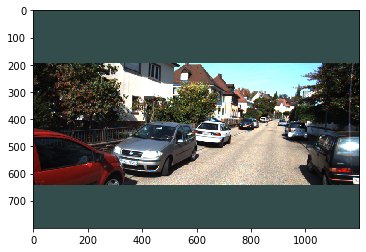

In [7]:
frame = renderer.get_rendered_frame()
plt.imshow(frame)

In [8]:
renderer.set_camera_coords(0, 1.5, -1)  
renderer.change_camera_rotation(0, -25)  

renderer.add_axis_lines()
renderer.render()

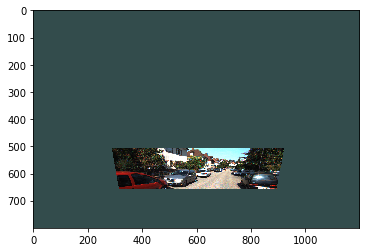

In [9]:
frame = renderer.get_rendered_frame()
plt.imshow(frame)

In [10]:
help(Utils.convert_depthmap_to_points)

Help on function convert_depthmap_to_points in module DepthVisualizer.DepthVisualizer:

convert_depthmap_to_points(depth_map, focal_length_in_pixels=None, principal_point=None, rgb_image=None, is_depth_along_z=True)
    Converts given depth map to point cloud
    :param depth_map: A grayscale image where values are equal to depth in meters
    :param focal_length_in_pixels: Focal lenght of the camera measured in pixels
    :param principal_point: Center of image
    :param rgb_image: Colored image that matches depth map, used for coloring points
    :param is_depth_along_z: If True, z coordinate of the pixel will be equal to depth, otherwise depth will be
    calculated as distance between camera and pixel
    :return: List of points where each point is of form [x, y, z, r, g, b]



In [11]:
predicted_depth_map = Utils.read_depth_map("predicted_depth.png")  # Assumes depth map is stored as 16 uint grayscale image where depth values are scaled by 256

In [12]:
points = Utils.convert_depthmap_to_points(predicted_depth_map, focal_length, principal_point, rgb_image)
renderer.set_points(points)
renderer.render()

Since now we are using a real depth map, all points do not lie on same plane, which results in noticable change when not viewed from center coordinates

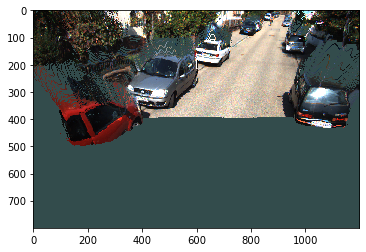

In [13]:
frame = renderer.get_rendered_frame()
plt.imshow(frame)

In [14]:
renderer.show_window()
renderer.render_loop() # Render loop will allow you to move around in 3D space using keyboard controls
renderer.hide_window() # Pressing ESC will cancel render loop, allowing code to continue executing

In [15]:
renderer.close()